In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
len(df)

50000

In [5]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [6]:
# train_labels and test_labels are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive"

df['sentiment']=np.where(df['sentiment']=='positive', 1, 0)

In [7]:
df['sentiment'].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

In [ ]:
#To get the maximum length of sentences in our dataset.

def max_len(df, c):
    max_len=0
    min_len=float("inf")
    for item in df[c]:
        max_len=max(max_len, len(item))
        min_len=min(min_len, len(item))
    return max_len, min_len
        

In [ ]:
max_len, min_len=max_len(df, 'review')

In [ ]:
max_len, min_len

In [ ]:

(13704+32)/2



In [8]:
df['review'][3000]

'I bought a set of 4 DVDs for 10 bucks at my local Suncoast, which contained this movie and three other trashy horror flicks (including its sequel "Witchcraft XI"). So basically I paid the rock bottom price of $2.50 for this movie, if you do the math. I can\'t exactly say I was ripped off. I have a thing for trashy horror movies, but this is the kind of trash that gives trash a bad name. The budget couldn\'t be over $1,000 (though it appears as if they spent a total of $1.50). I know it\'s a low-budget film, but that\'s no excuse for totally uninspired camerawork. The film "Blood Cult," though not very good, was made for an extremely low budget and still had fairly good camerawork and acting. The acting in this movie is the definition of "effortless," especially from that muscular guy with the Texas accent. Everyone is pretty much reading their lines off the page. You can take that figuratively or literally. I wouldn\'t be surprised if the script was off-camera as they were performing.

In [8]:


stopwords_special = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]



In [9]:
#to remove stop words, punctuation, special characters, and characters that are not of size 1 
#from column: review. I did not eliminate alphanumeric characters from the text.

import string
def remove_stop_words_punct(df, c):
    sentences = []
    output_sentences=[]
    table = str.maketrans('', '', string.punctuation)
    
    for row in df[c]:
        sentence = row
        for word in stopwords_special:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
            sentence = sentence.replace("  ", " ")
        sentences.append(sentence)

    for s in sentences:
        element = s.replace('<br />','')
        element = element.replace('"','')
        element = element.replace(')','')
        element = element.replace('(','')
        element = element.replace('{','')
        element = element.replace('}','')
        element = element.replace('\'','')
        element = element.replace('$','')
        element = element.replace('-','')
        element = element.replace('!','')
        element = element.replace(':','')
        element = element.replace(',','')
        element = element.replace('.','')                          
        output_sentences.append(' '.join( [w for w in element.split() if len(w)>1] ))

    return output_sentences



can try this later

tokens = [w.lower() for w in tokens]

# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]

# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]



In [ ]:
# element = l1.replace('<br />','')
# element = element.replace('"','')
# element = element.replace(')','')

In [10]:

sentences=remove_stop_words_punct(df, 'review')


In [11]:
#Looking good

sentences[3000]

'bought set DVDs 10 bucks local Suncoast contained movie three trashy horror flicks including sequel Witchcraft XI So basically paid rock bottom price 250 movie math cant exactly say ripped off thing trashy horror movies kind trash gives trash bad name The budget couldnt 1000 though appears spent total 150 know lowbudget film no excuse totally uninspired camerawork The film Blood Cult though not good made extremely low budget still fairly good camerawork acting The acting movie definition effortless especially muscular guy Texas accent Everyone pretty much reading lines off page You can take figuratively literally wouldnt surprised script offcamera performing said Ive never seen bad English actor This movie quite bad ones And though English movies arent always good always seem least level sophistication dont see Englishman Englishwoman volunteer homevideostyle schlock flick like this Did Merchant Ivory put hold casting calls? Usually think people hard directors actors Even worst movies

In [ ]:
# vocab_size = 10000
# embedding_dim = 16
# max_length = 120



In [12]:
labels=df['sentiment'].values.tolist()

In [13]:
#Splitting 80% of the dataset into a training set and 20% as validation set

training_portion=0.80
train_size = int(len(sentences)*training_portion)

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

40000
40000
40000
10000
10000


In [14]:
len(sentences)

50000

In [15]:

import csv
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

oov_tok = "<OOV>"
vocab_size=10000
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index



# What is num_words in Tokenizer stand for?
# num_words: the maximum number of words to keep, based on word frequency. Only the most common num_words-1 words 
# will be kept.
    
    

In [16]:

len(word_index)


188019

In [17]:

max_length = 6868 #average of max_len and min_len
trunc_type = 'post'
padding_type = 'post'

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type,  padding=padding_type)



In [18]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, truncating=trunc_type,  padding=padding_type)

print(len(validation_sequences))
print(validation_padded.shape)

10000
(10000, 6868)


In [19]:

train_padded.shape

(40000, 6868)

In [23]:
import numpy as np
training_padded = np.array(train_padded)
training_labels = np.array(train_labels)
validation_padded_data = np.array(validation_padded)
validation_label = np.array(validation_labels)

In [24]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(40000, 6868)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [26]:

history = model.fit(train_padded,train_labels,epochs=20,batch_size=512,validation_data=(validation_padded, validation_labels))



ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})

faced this error:

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})



In [ ]:

# embedding_dim = 16


Trying the above with only top 10000 words in the training data and as per the Deep Learning with Python github repo

https://nbviewer.jupyter.org/github/fchollet/deep-learning-with-python-notebooks/blob/master/3.5-classifying-movie-reviews.ipynb



In [3]:
import keras
keras.__version__

'2.4.3'

In [4]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

The argument num_words=10000 means that we will only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows us to work with vector data of manageable size.

In [14]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
len(train_data)

25000

In [7]:
# Since we restricted ourselves to the top 10,000 most frequent words, no word index will exceed 10,000:

max([max(sequence) for sequence in train_data])

9999

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [9]:
# Here's what our samples look like now:

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [17]:
x_train[0].tolist()

[0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [18]:
# We should also vectorize our labels, which is straightforward:
y_train = np.asarray(train_labels).astype('float32')#to match the float type data values in x_train and x_test
y_test = np.asarray(test_labels).astype('float32')

There are two key architecture decisions to be made about such stack of dense layers:

How many layers to use.
How many "hidden units" to chose for each layer.

A relu (rectified linear unit) is a function meant to zero-out negative values, while a sigmoid "squashes" arbitrary values into the [0, 1] interval, thus outputting something that can be interpreted as a probability.


In [19]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:


x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [22]:
partial_x_train.shape

(15000, 10000)

In [23]:
x_val.shape

(10000, 10000)

In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 1s 40ms/step - loss: 0.5053 - accuracy: 0.7962 - val_loss: 0.3966 - val_accuracy: 0.8604
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3041 - accuracy: 0.9071 - val_loss: 0.3037 - val_accuracy: 0.8887
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2225 - accuracy: 0.9293 - val_loss: 0.3297 - val_accuracy: 0.8628
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1791 - accuracy: 0.9403 - val_loss: 0.2783 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1438 - accuracy: 0.9531 - val_loss: 0.2857 - val_accuracy: 0.8863
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1174 - accuracy: 0.9637 - val_loss: 0.3232 - val_accuracy: 0.8758
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0976 - accuracy: 0.9730 - val_loss: 0.3103 - val_accuracy: 0.8826
Epoch 8/20
30

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

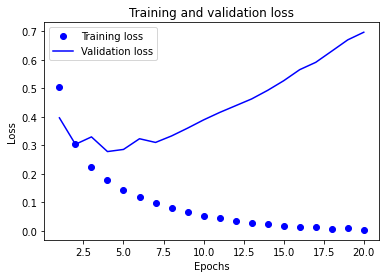

In [28]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


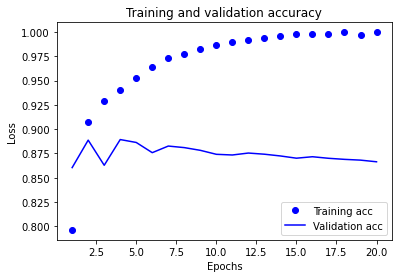

In [29]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [30]:
#To get unseen data from the test set to test the model's performance on

x_test1 = x_test[:24000]
x_test_unseen = x_test[24000:]

y_test1 = y_test[:24000]
y_test_unseen = y_test[24000:]

In [31]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test1, y_test1)

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.4455 - accuracy: 0.8235
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2571 - accuracy: 0.9083
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1966 - accuracy: 0.9312
Epoch 4/4
750/750 [==============================] - 2s 2ms/step - loss: 0.3311 - accuracy: 0.8703


In [32]:
results

[0.33106645941734314, 0.8702916502952576]

In [34]:
y_predict=model.predict(x_test_unseen)

In [41]:
y_predict[:5]

array([[0.02673262],
       [0.02429999],
       [0.992292  ],
       [0.9900469 ],
       [0.06925722]], dtype=float32)

In [42]:
y_test_unseen[:5]

array([0., 0., 1., 1., 0.], dtype=float32)